In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [58]:
df=pd.read_csv("C:/Users/ernbg/Desktop/persona.csv")

In [59]:
df.head()


,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [60]:
df.shape


(5000, 5)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB



How many unique resources are there and what are their frequencies?



In [62]:
df["SOURCE"].nunique

<bound method IndexOpsMixin.nunique of 0       android
1       android
2       android
3       android
4       android
         ...   
4995    android
4996    android
4997    android
4998    android
4999    android
Name: SOURCE, Length: 5000, dtype: object>

In [63]:
df["SOURCE"].value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

How many sales were made from which PRICE?

In [64]:
df["COUNTRY"].value_counts()

usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64

In [65]:
df.groupby("COUNTRY")["PRICE"].count()



COUNTRY
bra    1496
can     230
deu     455
fra     303
tur     451
usa    2065
Name: PRICE, dtype: int64

In [66]:
df.groupby("COUNTRY")["PRICE"].sum()

COUNTRY
bra    51354
can     7730
deu    15485
fra    10177
tur    15689
usa    70225
Name: PRICE, dtype: int64

In [67]:
df.groupby(by=['COUNTRY']).agg({"PRICE": "mean"})

,PRICE
COUNTRY,
bra,34.327540
can,33.608696
deu,34.032967
fra,33.587459
tur,34.787140
usa,34.007264


In [68]:
df.groupby(by=['SOURCE']).agg({"PRICE": "mean"})


,PRICE
SOURCE,
android,34.174849
ios,34.069102


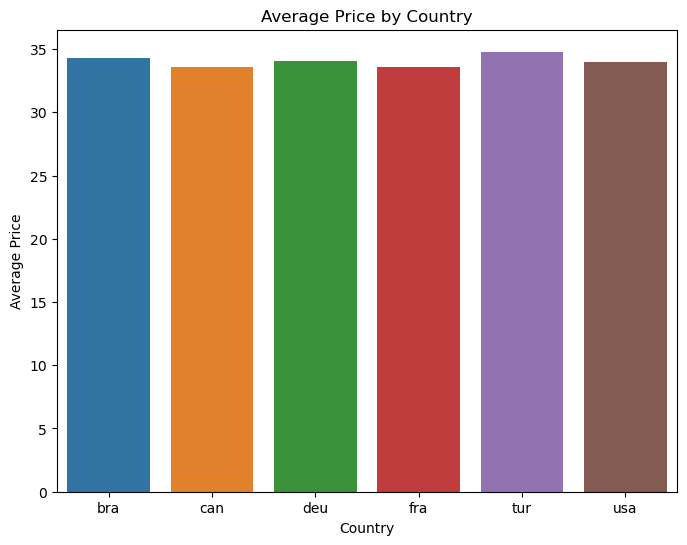

In [89]:
import seaborn as sns
average_price_by_country = df.groupby("COUNTRY")["PRICE"].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=average_price_by_country.index, y=average_price_by_country.values)
plt.title("Average Price by Country")
plt.xlabel("Country")
plt.ylabel("Average Price")
plt.show()

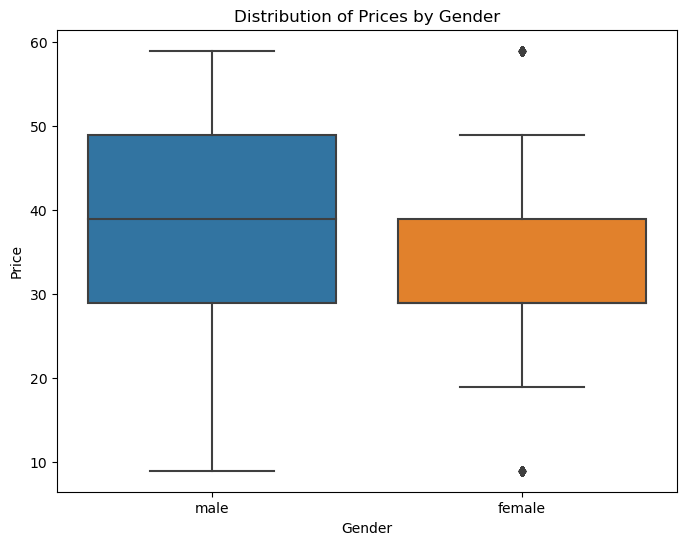

In [90]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="SEX", y="PRICE", data=df)
plt.title("Distribution of Prices by Gender")
plt.xlabel("Gender")
plt.ylabel("Price")
plt.show()

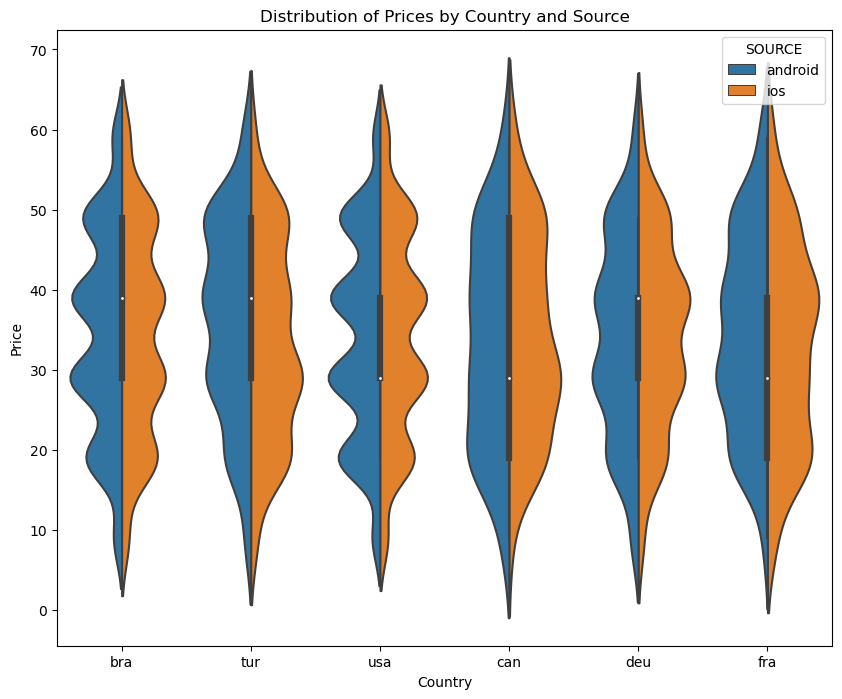

In [91]:
plt.figure(figsize=(10, 8))
sns.violinplot(x="COUNTRY", y="PRICE", hue="SOURCE", data=df, split=True)
plt.title("Distribution of Prices by Country and Source")
plt.xlabel("Country")
plt.ylabel("Price")
plt.show()


In [69]:
df.groupby(by=["COUNTRY", 'SOURCE']).agg({"PRICE": "mean"})


PRICE
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

In [70]:
df.groupby(["COUNTRY", 'SOURCE', "SEX", "AGE"]).agg({"PRICE": "mean"}).head()


PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897


 TASK 3: Sort the output by PRICE.
 
 Apply the sort_values method to PRICE in descending order to see the output in the previous question better.
 
 Save the output as agg_df.
 

In [71]:

agg_df = df.groupby(by=["COUNTRY", 'SOURCE', "SEX", "AGE"]).agg({"PRICE": "mean"}).sort_values("PRICE", ascending=False)
agg_df.head()

,,,,PRICE
COUNTRY,SOURCE,SEX,AGE,
bra,android,male,46,59.0
usa,android,male,36,59.0
fra,android,female,24,59.0
usa,ios,male,32,54.0
deu,android,female,36,49.0


In [72]:
agg_df = agg_df.reset_index()
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0


TASK 5: 
Convert AGE variable to categorical variable and add it to agg_df.

Convert the numeric variable age to a categorical variable.

Construct the intervals as you think will be persuasive.

For example: '0_18', '19_23', '24_30', '31_40', '41_70'

Let's specify where the AGE variable will be divided

In [73]:

bins = [0, 18, 23, 30, 40, agg_df["AGE"].max()]

In [74]:
# Let's express what the nomenclature will be for the dividing points:

mylabels = ['0_18', '19_23', '24_30', '31_40', '41_' + str(agg_df["AGE"].max())]

#Let's divide age:
agg_df["age_cat"] = pd.cut(agg_df["AGE"], bins, labels=mylabels)
agg_df.head()


,COUNTRY,SOURCE,SEX,AGE,PRICE,age_cat
0,bra,android,male,46,59.0,41_66
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40


 TASK 6: Identify new level based customers and add them as variables to the dataset.

Define a variable named customers_level_based and add this variable to the dataset.
Attention!
After creating customers_level_based values ​​with list comp, these values ​​need to be deduplicated.
For example, more than one of the following expressions: USA_ANDROID_MALE_0_18
It is necessary to take them to groupby and get the price average.


In [75]:


#Method 2
agg_df['customers_level_based'] = agg_df[['COUNTRY', 'SOURCE', 'SEX', 'age_cat']].agg(lambda x: '_'.join(x).upper(), axis=1)


In [93]:

#variable names:
agg_df.columns

# how can we reach the observation values?
for row in agg_df.values:
    print(row)


['BRA_ANDROID_FEMALE_0_18' 35.645302694721295 'B']
['BRA_ANDROID_FEMALE_19_23' 34.077340379017514 'C']
['BRA_ANDROID_FEMALE_24_30' 33.86394557823129 'C']
['BRA_ANDROID_FEMALE_31_40' 34.89832643940475 'B']
['BRA_ANDROID_FEMALE_41_66' 36.73717948717949 'A']
['BRA_ANDROID_MALE_0_18' 34.80586076094243 'B']
['BRA_ANDROID_MALE_19_23' 31.673243243243245 'D']
['BRA_ANDROID_MALE_24_30' 33.413919413919416 'C']
['BRA_ANDROID_MALE_31_40' 34.327380952380956 'B']
['BRA_ANDROID_MALE_41_66' 40.041666666666664 'A']
['BRA_IOS_FEMALE_0_18' 34.90041035353535 'B']
['BRA_IOS_FEMALE_19_23' 36.40384615384615 'A']
['BRA_IOS_FEMALE_24_30' 34.01587301587302 'C']
['BRA_IOS_FEMALE_31_40' 29.875901875901878 'D']
['BRA_IOS_FEMALE_41_66' 35.34090909090909 'B']
['BRA_IOS_MALE_0_18' 34.66455912508544 'B']
['BRA_IOS_MALE_19_23' 34.26604278074866 'B']
['BRA_IOS_MALE_24_30' 33.86486486486486 'C']
['BRA_IOS_MALE_31_40' 31.566137566137566 'D']
['BRA_IOS_MALE_41_66' 31.08369408369408 'D']
['CAN_ANDROID_FEMALE_0_18' 30.896551

In [77]:
[row[0].upper() + "_" + row[1].upper() + "_" + row[2].upper() + "_" + row[5].upper() for row in agg_df.values]


['BRA_ANDROID_MALE_41_66',
 'USA_ANDROID_MALE_31_40',
 'FRA_ANDROID_FEMALE_24_30',
 'USA_IOS_MALE_31_40',
 'DEU_ANDROID_FEMALE_31_40',
 'DEU_ANDROID_FEMALE_41_66',
 'DEU_IOS_MALE_19_23',
 'USA_ANDROID_FEMALE_41_66',
 'FRA_IOS_MALE_19_23',
 'USA_IOS_MALE_41_66',
 'DEU_ANDROID_MALE_0_18',
 'BRA_ANDROID_FEMALE_24_30',
 'USA_ANDROID_FEMALE_41_66',
 'TUR_IOS_MALE_24_30',
 'DEU_ANDROID_MALE_31_40',
 'TUR_IOS_FEMALE_0_18',
 'BRA_ANDROID_FEMALE_41_66',
 'BRA_IOS_FEMALE_19_23',
 'TUR_ANDROID_FEMALE_31_40',
 'BRA_ANDROID_FEMALE_31_40',
 'TUR_IOS_MALE_31_40',
 'TUR_ANDROID_MALE_0_18',
 'USA_IOS_MALE_24_30',
 'BRA_IOS_MALE_41_66',
 'DEU_ANDROID_MALE_19_23',
 'USA_IOS_MALE_24_30',
 'TUR_ANDROID_FEMALE_0_18',
 'USA_ANDROID_MALE_41_66',
 'TUR_ANDROID_MALE_24_30',
 'USA_IOS_FEMALE_41_66',
 'FRA_ANDROID_MALE_19_23',
 'USA_IOS_MALE_31_40',
 'TUR_ANDROID_FEMALE_0_18',
 'FRA_IOS_MALE_0_18',
 'TUR_IOS_FEMALE_19_23',
 'TUR_ANDROID_FEMALE_31_40',
 'TUR_ANDROID_MALE_24_30',
 'FRA_ANDROID_MALE_19_23',
 'BRA_AN

In [78]:
agg_df["customers_level_based"] = [row[0].upper() + "_" + row[1].upper() + "_" + row[2].upper() + "_" + row[5].upper() for row in agg_df.values]
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,age_cat,customers_level_based
0,bra,android,male,46,59.0,41_66,BRA_ANDROID_MALE_41_66
1,usa,android,male,36,59.0,31_40,USA_ANDROID_MALE_31_40
2,fra,android,female,24,59.0,24_30,FRA_ANDROID_FEMALE_24_30
3,usa,ios,male,32,54.0,31_40,USA_IOS_MALE_31_40
4,deu,android,female,36,49.0,31_40,DEU_ANDROID_FEMALE_31_40


In [79]:
# Gereksiz değişkenleri çıkaralım:
agg_df = agg_df[["customers_level_based", "PRICE"]]
agg_df.head()



,customers_level_based,PRICE
0,BRA_ANDROID_MALE_41_66,59.0
1,USA_ANDROID_MALE_31_40,59.0
2,FRA_ANDROID_FEMALE_24_30,59.0
3,USA_IOS_MALE_31_40,54.0
4,DEU_ANDROID_FEMALE_31_40,49.0


In [80]:
for i in agg_df["customers_level_based"].values:
    print(i.split("_"))

['BRA', 'ANDROID', 'MALE', '41', '66']
['USA', 'ANDROID', 'MALE', '31', '40']
['FRA', 'ANDROID', 'FEMALE', '24', '30']
['USA', 'IOS', 'MALE', '31', '40']
['DEU', 'ANDROID', 'FEMALE', '31', '40']
['DEU', 'ANDROID', 'FEMALE', '41', '66']
['DEU', 'IOS', 'MALE', '19', '23']
['USA', 'ANDROID', 'FEMALE', '41', '66']
['FRA', 'IOS', 'MALE', '19', '23']
['USA', 'IOS', 'MALE', '41', '66']
['DEU', 'ANDROID', 'MALE', '0', '18']
['BRA', 'ANDROID', 'FEMALE', '24', '30']
['USA', 'ANDROID', 'FEMALE', '41', '66']
['TUR', 'IOS', 'MALE', '24', '30']
['DEU', 'ANDROID', 'MALE', '31', '40']
['TUR', 'IOS', 'FEMALE', '0', '18']
['BRA', 'ANDROID', 'FEMALE', '41', '66']
['BRA', 'IOS', 'FEMALE', '19', '23']
['TUR', 'ANDROID', 'FEMALE', '31', '40']
['BRA', 'ANDROID', 'FEMALE', '31', '40']
['TUR', 'IOS', 'MALE', '31', '40']
['TUR', 'ANDROID', 'MALE', '0', '18']
['USA', 'IOS', 'MALE', '24', '30']
['BRA', 'IOS', 'MALE', '41', '66']
['DEU', 'ANDROID', 'MALE', '19', '23']
['USA', 'IOS', 'MALE', '24', '30']
['TUR', 'AN

In [81]:
agg_df["customers_level_based"].value_counts()


BRA_ANDROID_MALE_24_30      7
USA_ANDROID_MALE_41_66      7
USA_IOS_FEMALE_24_30        7
BRA_ANDROID_FEMALE_24_30    7
USA_ANDROID_MALE_24_30      7
                           ..
TUR_ANDROID_MALE_41_66      1
CAN_ANDROID_MALE_19_23      1
TUR_IOS_MALE_31_40          1
TUR_IOS_MALE_24_30          1
CAN_ANDROID_FEMALE_24_30    1
Name: customers_level_based, Length: 109, dtype: int64

In [82]:
agg_df = agg_df.groupby("customers_level_based").agg({"PRICE": "mean"})


In [83]:
agg_df = agg_df.reset_index()
agg_df.head()


,customers_level_based,PRICE
0,BRA_ANDROID_FEMALE_0_18,35.645303
1,BRA_ANDROID_FEMALE_19_23,34.077340
2,BRA_ANDROID_FEMALE_24_30,33.863946
3,BRA_ANDROID_FEMALE_31_40,34.898326
4,BRA_ANDROID_FEMALE_41_66,36.737179


In [84]:
agg_df["customers_level_based"].value_counts()


BRA_ANDROID_FEMALE_0_18    1
TUR_ANDROID_FEMALE_0_18    1
TUR_IOS_FEMALE_19_23       1
TUR_IOS_FEMALE_0_18        1
TUR_ANDROID_MALE_41_66     1
                          ..
CAN_IOS_MALE_41_66         1
CAN_IOS_MALE_31_40         1
CAN_IOS_MALE_24_30         1
CAN_IOS_MALE_0_18          1
USA_IOS_MALE_41_66         1
Name: customers_level_based, Length: 109, dtype: int64

1. Segment by PRICE 
2. add segments to agg_df with the naming "SEGMENT" 
3. describe the segments

In [85]:

agg_df["SEGMENT"] = pd.qcut(agg_df["PRICE"], 4, labels=["D", "C", "B", "A"])
agg_df.head(30)
agg_df.groupby("SEGMENT").agg({"PRICE": "mean"})


,PRICE
SEGMENT,
D,29.206780
C,33.509674
B,34.999645
A,38.691234



TASK 8: Classify the new customers and estimate how much income they can bring. 

What segment does a 33-year-old Turkish woman using ANDROID belong to and how much income is expected to earn on average?


In [92]:

new_user = "TUR_ANDROID_FEMALE_31_40"
agg_df[agg_df["customers_level_based"] == new_user]

,customers_level_based,PRICE,SEGMENT
72,TUR_ANDROID_FEMALE_31_40,41.833333,A


In which segment and on average how much income would a 35 year old French woman using iOS expect to earn?


In [87]:
new_user = "FRA_IOS_FEMALE_31_40"
agg_df[agg_df["customers_level_based"] == new_user]


,customers_level_based,PRICE,SEGMENT
63,FRA_IOS_FEMALE_31_40,32.818182,C
